## **Разведовательный анализ данных**

**Описание данных:**

Набор данных состоит из 12 330 наблюдений. \
Набор данных был сформирован таким образом, что каждая сессия принадлежит разным пользователям в течение 1 года. \
Набор данных состоит из 10 числовых и 8 категориальных атрибутов. \
Атрибут `Доход` - это метка класса.

Здесь приведен базовый анализ данных, направленный на:

- анализ качества данных
- восстановление данных (устранение пропусков)
- анализ и, при необходимости, устранение аномалий в данных
- определение наиболее влиятельных прищнаков для последующего обучения наиболее понятной для бизнеса модели ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1.Общее исследование данных:**

- Проверены размер таблицы, число столбцов, количество и причины пропусков в столбцах.

In [11]:
df = pd.read_csv('./data/online_shoppers_intention.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [12]:
pd.Series(df.isna().sum()/len(df)*100)[df.isna().sum()/len(df)*100 > 0]

Informational_Duration     1.613950
ProductRelated_Duration    3.982157
ExitRates                  0.802920
dtype: float64

In [13]:
df[df['Informational_Duration'].isna() == True].head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
19,0,0.0,0,NaN,20,2981.166667,0.0,0.010000,0.0,0.0,Feb,2,4,4,4,Returning_Visitor,False,False
130,0,0.0,0,NaN,2,222.000000,0.0,0.100000,0.0,0.0,Feb,2,6,1,2,Returning_Visitor,True,False
134,6,111.5,0,NaN,26,449.027778,0.0,0.018519,0.0,0.6,Feb,1,1,3,3,Returning_Visitor,False,False


In [14]:
df[df['ProductRelated_Duration'].isna() == True].head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
30,0,0.0,0,0.0,2,NaN,0.000000,NaN,0.0,0.0,Feb,1,1,6,3,Returning_Visitor,False,False
35,0,0.0,0,0.0,52,NaN,0.015385,0.020353,0.0,0.0,Feb,2,2,7,1,Returning_Visitor,False,False
107,0,0.0,0,0.0,12,NaN,0.050000,0.066667,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False


In [15]:
df[df['ExitRates'].isna() == True].head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8,0,0.0,0,0.0,2,37.0,0.000000,NaN,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
30,0,0.0,0,0.0,2,NaN,0.000000,NaN,0.0,0.0,Feb,1,1,6,3,Returning_Visitor,False,False
83,0,0.0,0,0.0,12,375.0,0.016667,NaN,0.0,0.0,Feb,3,2,4,1,Returning_Visitor,False,False


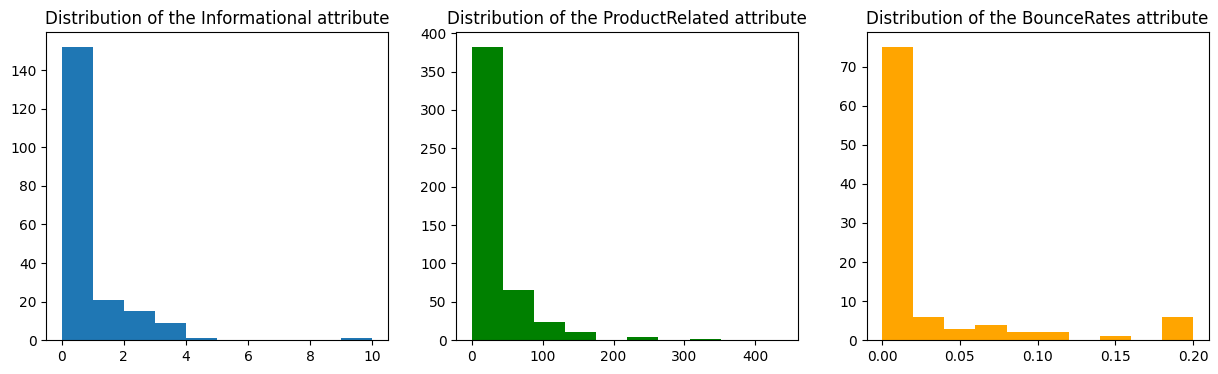

In [16]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.hist(df[df['Informational_Duration'].isna() == True]['Informational'])
ax1.set_title(f'Distribution of the Informational attribute')

ax2.hist(df[df['ProductRelated_Duration'].isna() == True]['ProductRelated'], color='green')
ax2.set_title(f'Distribution of the ProductRelated attribute')

ax3.hist(df[df['ExitRates'].isna() == True]['BounceRates'], color='orange')
ax3.set_title(f'Distribution of the BounceRates attribute')

figure.set_figheight(4)
figure.set_figwidth(15)
plt.show()

**Размер таблицы:** 12330x18, явно можно было посмотреть методов `df.shape` \
**Пропуски в данных:** есть в трех столбцах. Рассмотрение связанных с ними столбцов показывает, что:
- для признака Informational_Duration пропуски могут быть связаны с тем, что данная секция страниц не посещалась,
- для признака ExitRates пропуски могут быть связаны с тем, что выход не улавливался,
- для признака ProductRelated_Duration пропуски похожи на ошибки в данных

**Принято решение** заполнить нулевыми значениями пропуски в столбцах Informational_Duration, ExitRates. Обработку пропусков столбца  ProductRelated_Duration выбрать после анализа всех признаков, базовый вариант, во избежание неточностей - удалить наблюдения, в которых этот признак отстутсвует. Это лишит нас приближенно 4% данных. 

Кроме того, важно поставить задачу на уточнение природы пропусков. 

In [20]:
n_samples_before = df.shape[0]
n_true_class_before = df['Revenue'].value_counts()[1]
n_negative_class_before = df['Revenue'].value_counts()[0]

df[['Informational_Duration', 'ExitRates']] = df[['Informational_Duration', 'ExitRates']].fillna(0)


n_samples_after = df.dropna().shape[0]
n_true_class_after = df.dropna()['Revenue'].value_counts()[1]
n_negative_class_after = df.dropna()['Revenue'].value_counts()[0]

print(f'Может быть потеряно {100 - n_samples_after/n_samples_before*100} % данных')
print(f'Может быть потеряно {n_true_class_before - n_true_class_after} наблюдений меньшего класса')
print(f'Может быть потеряно {n_negative_class_before - n_negative_class_after} наблюдений большего класса')

Может быть потеряно 3.982157339821569 % данных
Может быть потеряно 87 наблюдений меньшего класса
Может быть потеряно 404 наблюдений большего класса


In [22]:
print(f'Может быть потеряно {(1 - n_true_class_after/n_true_class_before)*100} % наблюдений меньшего класса')
print(f'Может быть потеряно {(1 - n_negative_class_after/n_negative_class_before)*100} % наблюдений большего класса')

Может быть потеряно 4.559748427672961 % наблюдений меньшего класса
Может быть потеряно 3.876415275379008 % наблюдений большего класса


**Вывод:**

В обоих классах при удалении могут быть потеряны сопоставимые проценты, следовательно удаление принято за базовую предобработку пропусков. Дальше изменены некоторые типы данных для дальнейшей работы с корректным форматом данных.

In [23]:
df['Revenue'] = df['Revenue'].astype(int)

## **2. Однофакторный анализ** 
В данном блоке столбцы разделены на категориальные (номиальные) и количественные. По каждому столбцу оценено распределение. Рассмотрена связь данных между друг другом при помощи статистических коэффициентов оценки взаимосвязи.


`Administrative`, `Administrative_Duration`, `Informational`,
`Informational_Duration`, `ProductRelated`, `ProductRelated_Duration` , `BounceRates`, `ExitRates`, `PageValues`,`SpecialDay` —  числовые  переменные

`Month`, `OperatingSystems`, `Browser`, `Region`, `TrafficType`,`VisitorType`, `Weekend`,`Revenue`— номиальные переменные


In [25]:
categorical_features = ['Revenue', 'Weekend', 'VisitorType', 'TrafficType', 'Region', 'Browser', 'OperatingSystems', 'Month']
continuous_feutures = list(set(df.columns) - set(categorical_features))

**Оценка распределений непрерывных признаков и их связи с целевой переменной.**

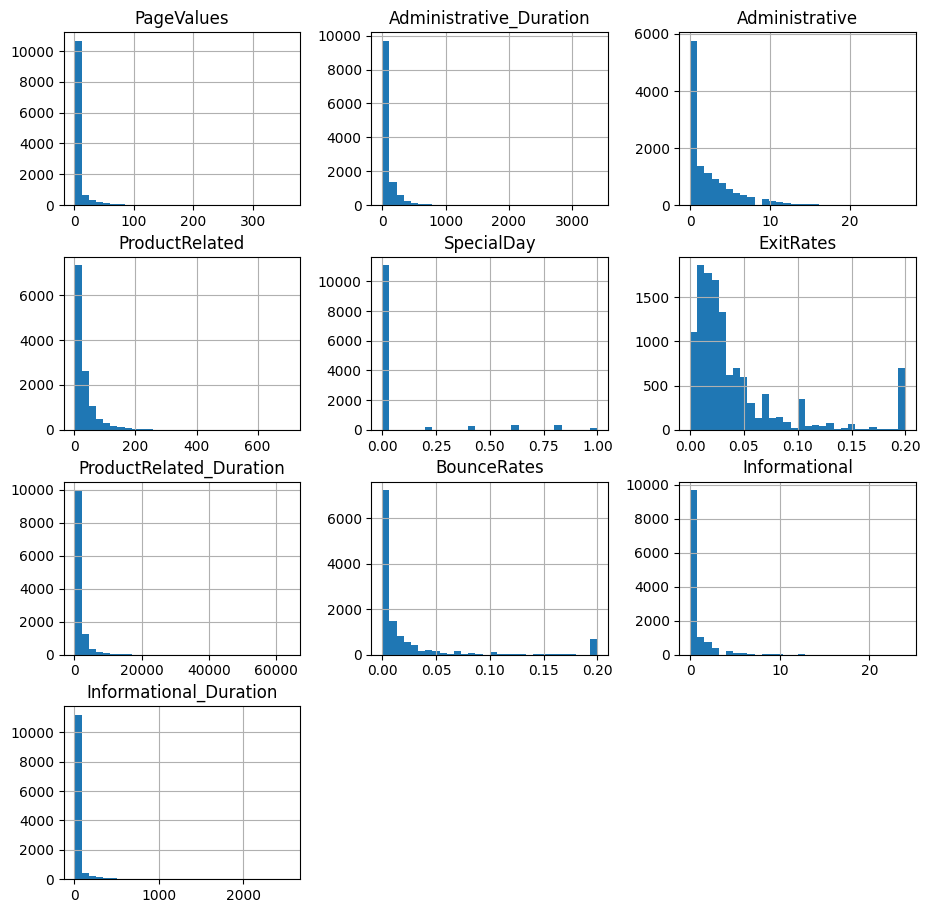

In [26]:
df.hist(column=continuous_feutures, figsize=(11, 11), bins=30); #distributions

[Text(0, 0, '1251'), Text(0, 0, '11079')]

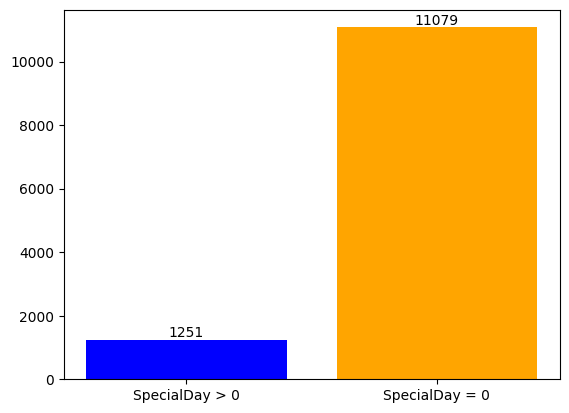

In [27]:
bar = plt.bar(x=['SpecialDay > 0', 'SpecialDay = 0'], 
             height=[sum(df['SpecialDay'] > 0), len(df) - sum(df['SpecialDay'] > 0)], color=['blue', 'orange'])

plt.bar_label(bar)

In [28]:
df['SpecialDay_categorical'] = (df['SpecialDay'] > 0).astype(int)

categorical_features += ['SpecialDay_categorical']

**Вывод о распределениях** 

1. Все признаки распределены со скосом вправо, концентрация значений около нуля. 
2. Масштабы говорят о наличии выбросов в переменных.
3. Переменная `SpecialDay` является сильно разреженой, её можно попробовать трансформировать в категориальную. 


**2.1. Оценка взаимосвязи распределений непрерывных признаков между друг-другом.**

Для применения корреляции Пирсона данные масштабированы, так как тест Пирcона основан на предположении о нормальном распределении признаков.

In [14]:
pirson_correlation_map = np.log(df[continuous_feutures]).corr()
spearman_correlation_map = df[continuous_feutures].corr('spearman')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<AxesSubplot: >

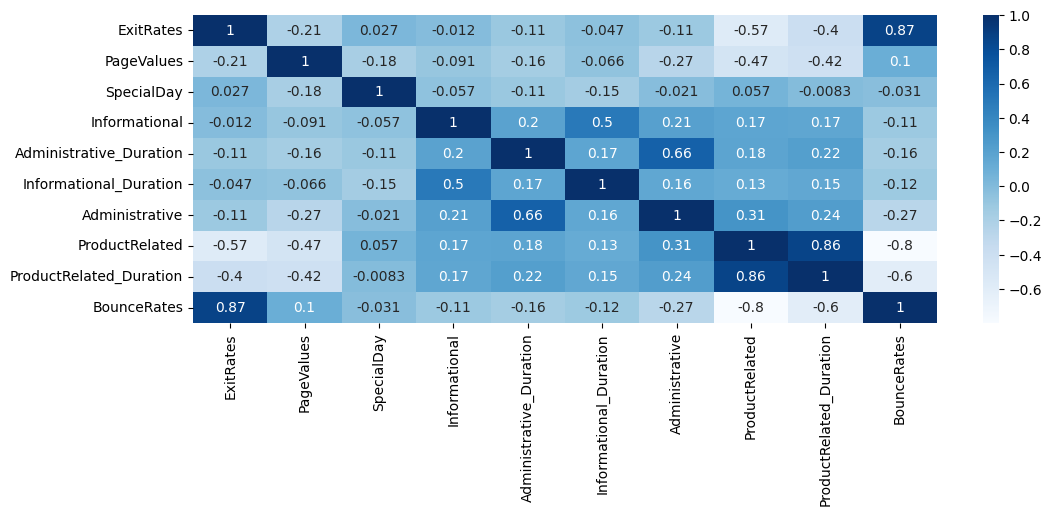

In [15]:
fig = plt.figure(figsize=(12, 4))
sns.heatmap(pirson_correlation_map, annot=True, cmap='Blues')

<AxesSubplot: >

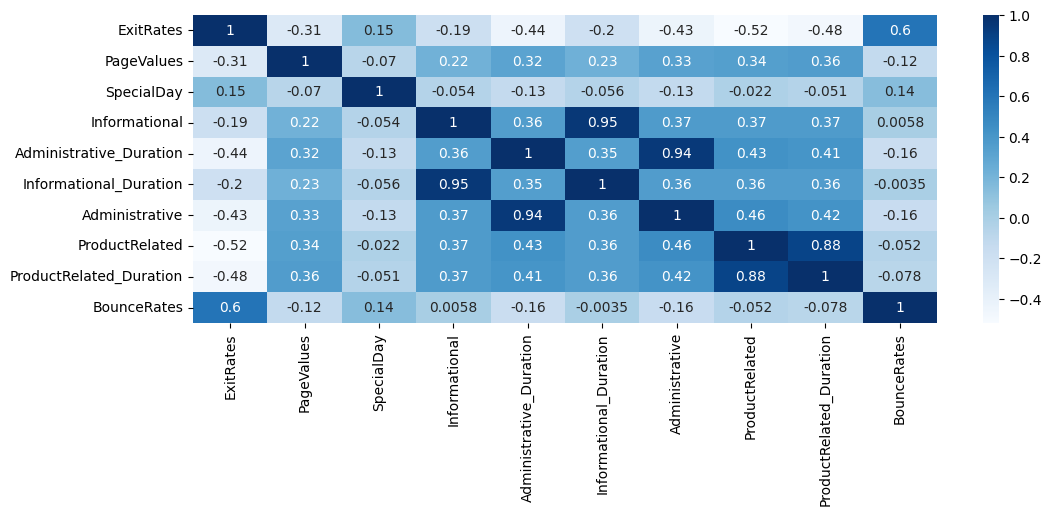

In [16]:
fig = plt.figure(figsize=(12, 4))
sns.heatmap(spearman_correlation_map, annot=True, cmap='Blues')

**Вывод о взаимосвязях численных переменных:**

1.  Переменные с количеством страниц и длительностью пребывания на этих страницах сколерированы. Наблюдаются значения корреляции больше 0.6 как Пирсона (линейная связь), так и Спирмена (линейная связь, монотонная связь). Следовательно в парах таких переменных для обучения модели можно протестировать гипотезу взять только один признак из пары. Кроме того, вследствие этого, можно не удалять строки с пропусками в толбце `ProductRelated_Duration` и обучиться на более полном наборе данных. 
2. Также наблюдается высокая линейная и монотонная больше средней связи для переменных Bounce Rates и Exit Rates.

<AxesSubplot: >

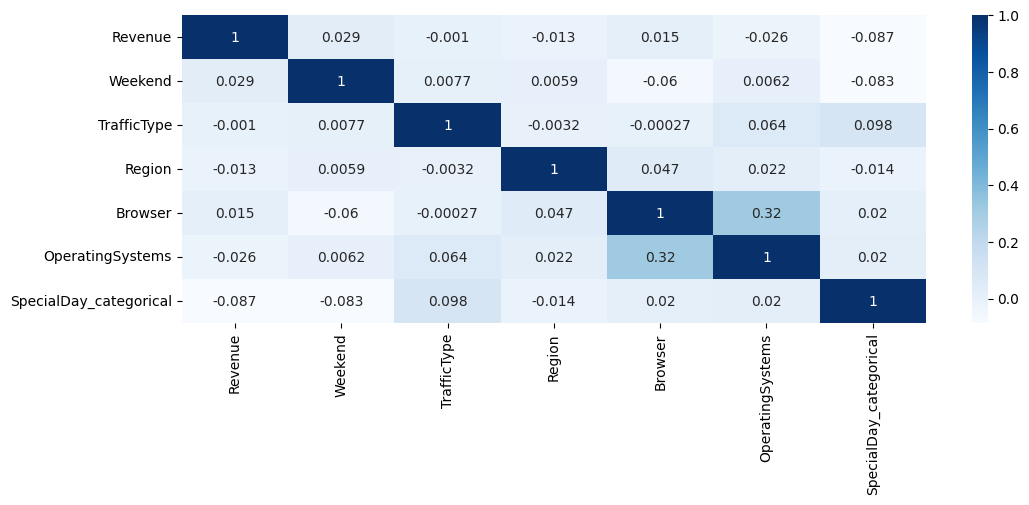

In [17]:
fig = plt.figure(figsize=(12, 4))
kendall_corr = df[categorical_features].corr('kendall')
sns.heatmap(kendall_corr, annot=True, cmap='Blues')

**Вывод о взаимосвязях численных переменных:**
1. Для номиальных признаков сильной взаимосвязи друг между другом не наблюдается, кроме некоторой связи типа браузера и используемой ОС.

## **3. Анализ целевого признака**

В данном блоке рассмотрен целевой признак и его взаимосвязь с имеющимися факторами в данных.

In [18]:
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [29]:
10422/len(df)

0.8452554744525548

**Вывод:** 
Целевая переменная является дитохомической (выраженной двумя классами). Данные разбалансированны, 85% наблюдений отрицательного класса (0, класс отсутствия выручки), 15% положительного класса (1, класс наличия выручки). 

**3.1. Взаимосвязь целевого признака с количественными переменными.** \
Применена оценка точечно-бисериальной корреляции (point-biserial correlation) — для оценки взаимосвязи между количественной переменной и дихотомической качественной переменной.

In [30]:
from scipy.stats import pointbiserialr

for i in df[continuous_feutures]:

  corrcoef = pointbiserialr(df[i].fillna(0), df['Revenue'])[0]
  print(f'Связь переменной {i} с целевой переменной', round(corrcoef, 3))

Связь переменной PageValues с целевой переменной 0.493
Связь переменной Administrative_Duration с целевой переменной 0.094
Связь переменной Administrative с целевой переменной 0.139
Связь переменной ProductRelated с целевой переменной 0.159
Связь переменной SpecialDay с целевой переменной -0.082
Связь переменной ExitRates с целевой переменной -0.206
Связь переменной ProductRelated_Duration с целевой переменной 0.147
Связь переменной BounceRates с целевой переменной -0.151
Связь переменной Informational с целевой переменной 0.095
Связь переменной Informational_Duration с целевой переменной 0.07


**Вывод:**

Сильных взаимосвязей коэффициентом не выявлено. Посмотрим на распределения по двум группам наблюдения при помощи критерий Манна-Уитни. Это статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню количественного признака.

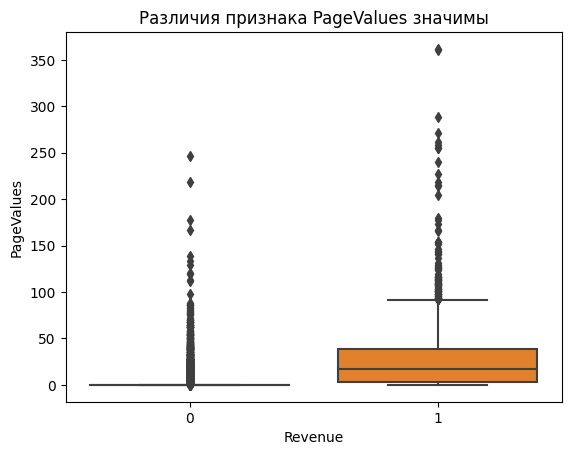

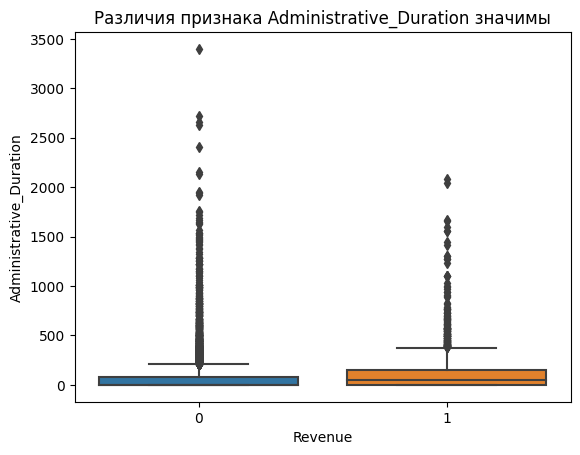

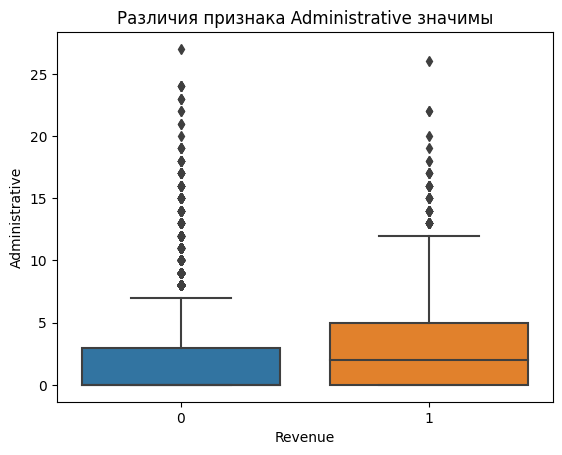

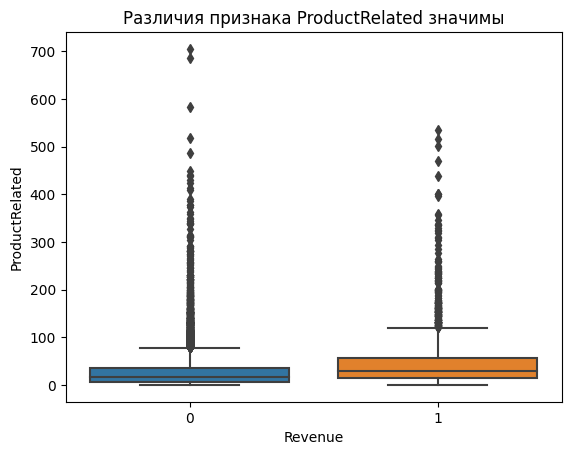

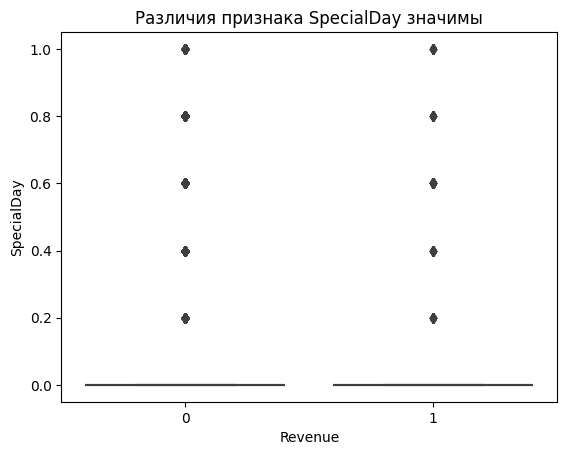

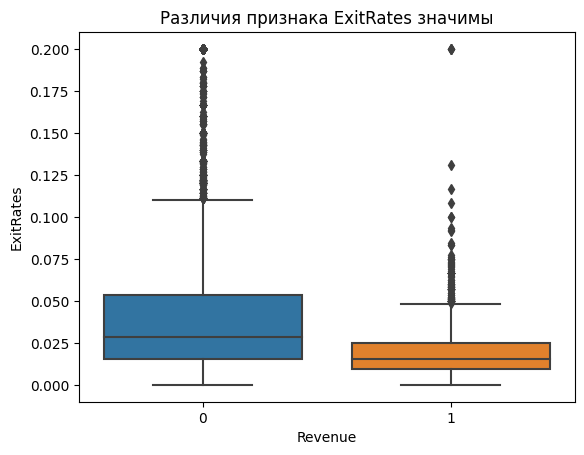

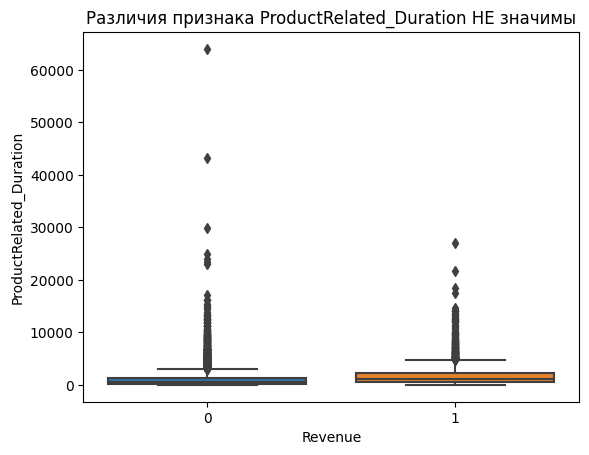

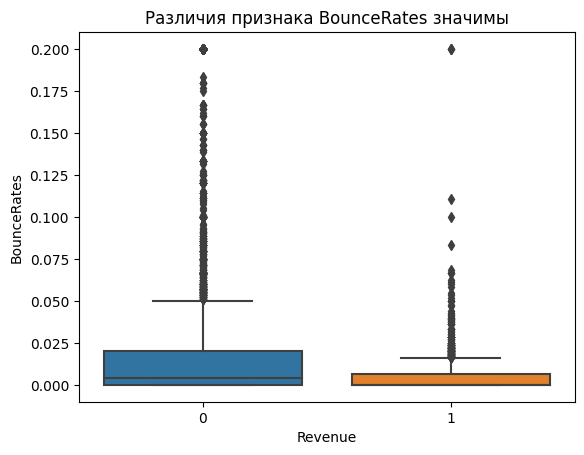

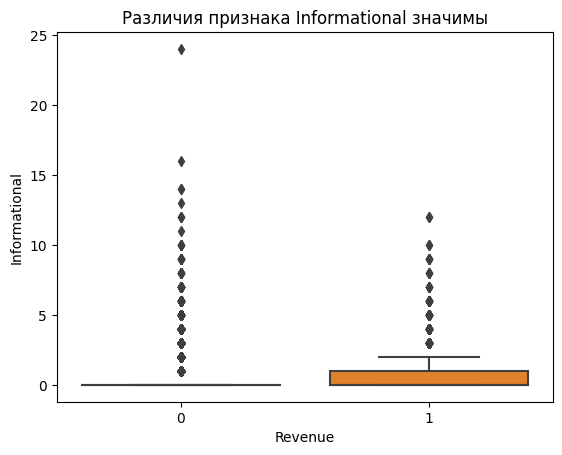

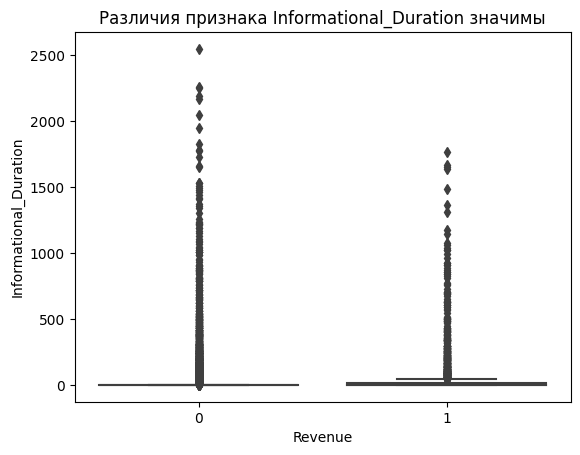

In [31]:
from scipy.stats import mannwhitneyu

df_group1 = df.query('Revenue == 0')
df_group2 = df.query('Revenue == 1')

title = None

for i in continuous_feutures:

  mw_test_st, mw_test_pv = mannwhitneyu(x=df_group1[i].sort_values(), y=df_group2[i].sort_values())
  if mw_test_pv < 0.05:
    title = f'Различия признака {i} значимы'
  else:
    title = f'Различия признака {i} НЕ значимы'

  fig = plt.figure()
  sns.boxplot(data=df, x='Revenue', y=i).set_title(title)

  plt.show()

**Выводы:**

- Все признаки, кроме признака ProductRelated_Duration и ExitRates  значимы согласно тесту на равенство. 

- `SpecialDay` на значимость следует проанализировать дополнительно, так как много нулей в признаке. 
 

- Принято решение попробовать исключить признаки о длительности (с суффиксом `_Duration`) и признак `ExitRates`.

In [32]:
 df_significant = df.drop(['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'ExitRates'], axis=1)

**3.2 Анализ влияния номиальных признаков на целевую переменную.** \
Применен критерий хи-квадрат для оценки взаимосвязи между номильными переменными и дихотомической качественной переменной.


In [33]:
def get_binary_categorical_plot(data, classes, binary_target):
    
    
    true_series = data[data[binary_target] == True][classes].value_counts().reset_index()
    true_series.columns = ['index', binary_target]
    true_series.sort_values(by='index', inplace=True)
    
    false_series = data[data[binary_target] == False][classes].value_counts().reset_index()
    false_series.columns = ['index', binary_target]
    false_series.sort_values(by='index', inplace=True)
    
    plt.plot(true_series['index'], true_series[binary_target], label = binary_target + ' = True')
    plt.plot(false_series['index'], false_series[binary_target], label = binary_target + ' = False')
    plt.legend()
    plt.title(f'Изменение целевого признака для категорий {classes}')
    
    plt.show()
    
    

In [34]:
for i in categorical_features:
    
    print(f'ПРИЗНАК {i}')
    print(df[i].value_counts())
    print('\n')

ПРИЗНАК Revenue
0    10422
1     1908
Name: Revenue, dtype: int64


ПРИЗНАК Weekend
False    9462
True     2868
Name: Weekend, dtype: int64


ПРИЗНАК VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


ПРИЗНАК TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


ПРИЗНАК Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64


ПРИЗНАК Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


ПРИЗНАК OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystem

Признак с месяцами заполнен некорректно. 

In [35]:
def convert_visitor_type(i):

    if i == 'New_Visitor':
        return 0
    if i == 'Returning_Visitor':
        return 1
    if i == 'Other':
        return 2

def convert_month(i):

    if i == 'jan':
        return 0
    if i == 'feb':
        return 1
    if i == 'mar':
        return 2
    if i == 'apr':
        return 3
    if i == 'may':
        return 4
    if i == 'jun':
        return 5
    if i == 'jul':
        return 6
    if i == 'aug':
        return 7
    if i == 'sep':
        return 8
    if i == 'oct':
        return 9
    if i == 'nov':
        return 10
    if i == 'dec':
        return 11
        

In [36]:
df['Month'] = df['Month'].apply(lambda x: x.lower()[:3])
df['Month'] = df['Month'].apply(convert_month)

df['VisitorType'] = df['VisitorType'].apply(convert_visitor_type)

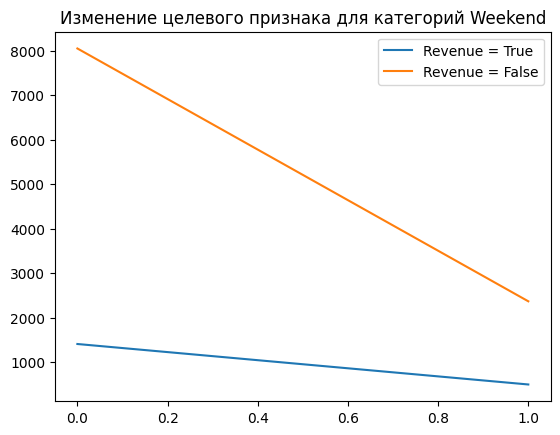

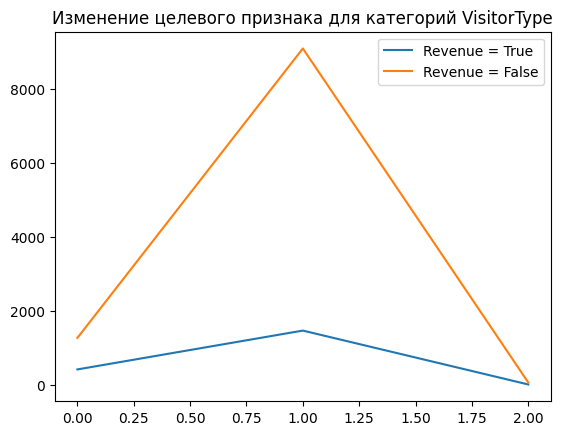

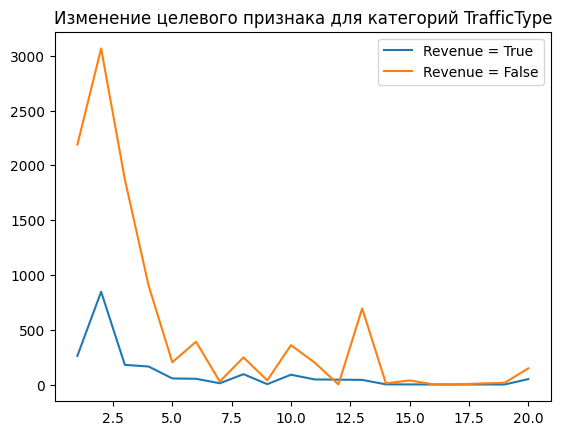

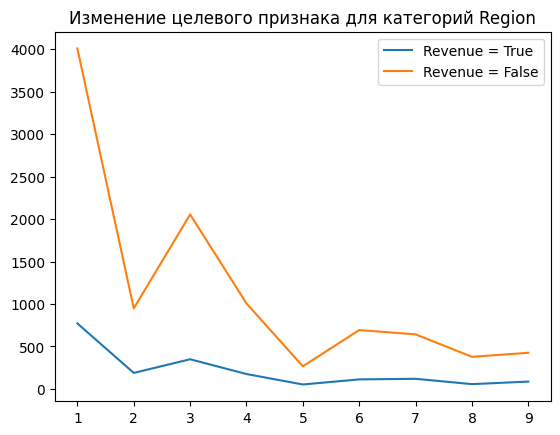

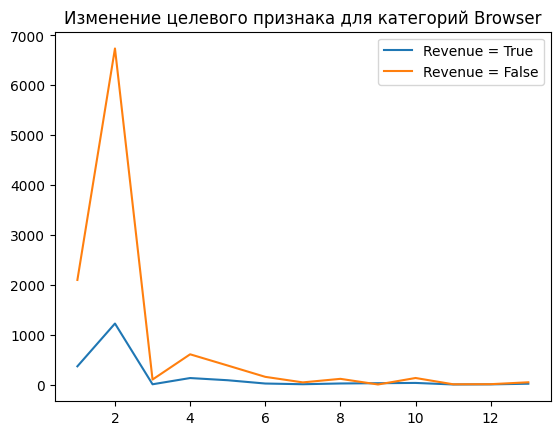

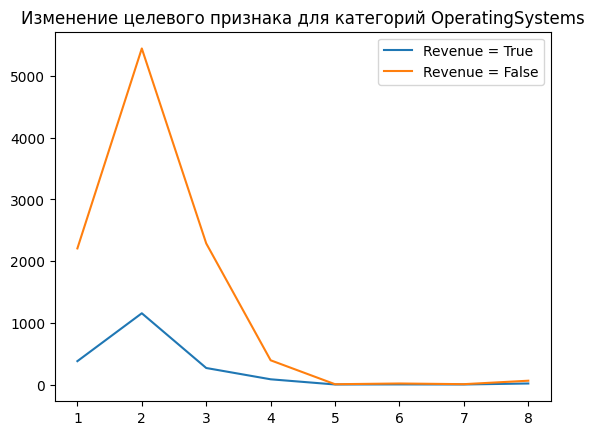

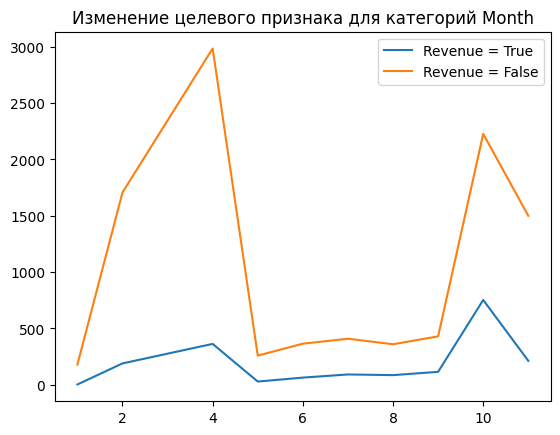

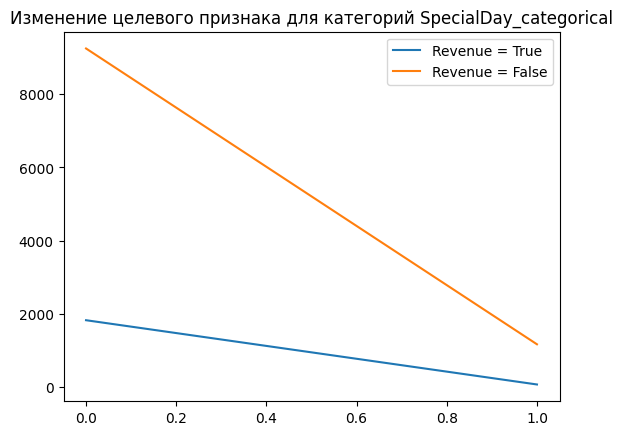

In [37]:
for i in categorical_features[1:]:

    get_binary_categorical_plot(df, i, 'Revenue')
    

In [38]:
from sklearn.feature_selection import chi2
_, pvalues = chi2(df[categorical_features], df['Revenue'])

for pvalue, name in zip(pvalues, df[categorical_features].columns):

  if pvalue < 0.05:
    print(f'Номиальные переменные вероятно влияют на целевой признак для переменной {name}')

  else:
    print(f'Номиальные переменные вероятно НЕ влияют на целевой признак для переменной {name}')

Номиальные переменные вероятно влияют на целевой признак для переменной Revenue
Номиальные переменные вероятно влияют на целевой признак для переменной Weekend
Номиальные переменные вероятно влияют на целевой признак для переменной VisitorType
Номиальные переменные вероятно НЕ влияют на целевой признак для переменной TrafficType
Номиальные переменные вероятно НЕ влияют на целевой признак для переменной Region
Номиальные переменные вероятно влияют на целевой признак для переменной Browser
Номиальные переменные вероятно НЕ влияют на целевой признак для переменной OperatingSystems
Номиальные переменные вероятно влияют на целевой признак для переменной Month
Номиальные переменные вероятно влияют на целевой признак для переменной SpecialDay_categorical


Для данной выборки не выявлено статистической значимости для признаков `TrafficType`, `Region`, `OperatingSystems`. Уберем эти признаки из данных и продолжим работать с 6 признаками.

In [39]:
df_significant = df_significant.drop(categorical_features[1:], axis=1)
df_significant.shape

(12330, 7)

In [40]:
df_significant.to_csv('./data/df_significant.csv')

In [30]:
df.dropna().to_csv('./data/cleaned_data.csv')

## **Результаты EDA**
- В ходе разведовательного анализа набор данных для обучения был сведен к двум возможным. Первый - с 17 признаками, второй с 6.
  В первом наборе данных, помимо большего количества признаков удалены наблюдения, содержащие пропуски в переменной `ProductRelated_Duration`
- Необходимо уточнение природы пропусков в данных и проверка логирования данных о пользователях в Google Analytics
- Было замечено, что переменные о количестве посещенных страниц и длительности пребывания на страницах связаны монотонно, что значит, что в будущую модель может можно не вбирать избыточную информацию.

**Дальнейший анализ и планируемая работа**

- Оценить релевантность удаления признаков путем обучения двух алгоритмов на множестве всех и подмножестве некоторых признаков.
- Для модели планируется оценить влияние добавления категориальынх признаков на качество `TrafficType`, `VisitorType`, `OperatingSystems`.
- Также в ходе обучения модели планируется оценить необходимость чистки набора данных от аномалий. С одной стороны, сохранить аномалии хороший тон, поскольку они не исключены при реальной работе модели. С другой — сохранение аномалий может несколько ухудшить обобщающие способности будущей модели.